In [2]:
import numpy as np
from numpy import random
import os

os.environ["KERAS_BACKEND"] = "tensorflow"
import keras_cv as tfkcv
import tensorflow as tf
#from tensorflow import keras as tfk
import keras as tfk       #notice how I'm importing keras and not tensorflow.keras
#from keras.layers import Input, Dense, Dropout, Lambda
#from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from keras import layers as tfkl


print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {tfk.__version__}")
print(f"Keras_cv version->{tfkcv.__version__}")
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras




# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
#import cv2

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from PIL import Image
import matplotlib.gridspec as gridspec
import requests
import pandas as pd
from io import BytesIO

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline


2024-11-23 13:10:22.656639: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-23 13:10:22.863554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-23 13:10:22.941554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-23 13:10:22.966595: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-23 13:10:23.130219: I tensorflow/core/platform/cpu_feature_guar

Tensorflow version -> 2.17.0
Keras version -> 3.4.1
Keras_cv version->0.9.0
2.17.0


# LOADING DATA
Loading the original dataset.

In [3]:
import numpy as np

data = np.load('/home/rigers/projects/training_set.npz')
X = data['images']
y = data['labels']
for key in data.keys():
  print(key)

print(X.shape)
print(y.shape)

print(y[0])

images
labels
(13759, 96, 96, 3)
(13759, 1)
[7]


Here we eliminate **DUPLICATED DATA**  from the dataset using a hash function. 
Two identical images will have the same hash value. This is done to avoid one image having a bigger weight on the model.

In [ ]:

import hashlib

def image_to_hash(image):
    #Convert an image array to a hash value.
    return hashlib.sha256(image.tobytes()).hexdigest()

def find_duplicate_images(images):
    #Find and return indices of duplicate images.
    hash_dict = {}
    duplicates = []

    for index, image in enumerate(images):
        image_hash = image_to_hash(image)
        if image_hash in hash_dict:
            duplicates.append((hash_dict[image_hash], index))
        else:
            hash_dict[image_hash] = index
    
    return duplicates

def remove_duplicate_images(images, duplicates):
    #Remove duplicate images based on provided duplicate index pairs.
    # Create a set of all indices that need to be removed
    remove_indices = {idx for _, idx in duplicates}
    
    # Create a mask that marks images to keep
    mask = np.array([i not in remove_indices for i in range(images.shape[0])])
    
    # Filter the array
    filtered_images = images[mask]
    
    return filtered_images

# Example 4D array: (number_of_images, height, width, channels)
images = np.random.rand(10, 64, 64, 3)

# Add a duplicate for testing
images[9] = images[0]

# Find duplicates
duplicates = find_duplicate_images(X)
print("Duplicate image pairs (index pairs):", duplicates)

# Remove duplicates
X = remove_duplicate_images(X, duplicates)
y = remove_duplicate_images(y, duplicates)


print("Filtered images shape:", X.shape)
print("Filtered images shape:", y.shape)



Duplicate image pairs (index pairs): [(1074, 3440), (120, 4761), (8117, 9084), (7953, 10734), (810, 11026), (3052, 11566), (3328, 11575), (5466, 11856), (11959, 11960), (11959, 11961), (11959, 11962), (11959, 11963), (11959, 11964), (11959, 11965), (11959, 11966), (11959, 11967), (11959, 11968), (11959, 11969), (11959, 11970), (11959, 11971), (11959, 11972), (11959, 11973), (11959, 11974), (11959, 11975), (11959, 11976), (11959, 11977), (11959, 11978), (11959, 11979), (11959, 11980), (11959, 11981), (11959, 11982), (11959, 11983), (11959, 11984), (11959, 11985), (11959, 11986), (11959, 11987), (11959, 11988), (11959, 11989), (11959, 11990), (11959, 11991), (11959, 11992), (11959, 11993), (11959, 11994), (11959, 11995), (11959, 11996), (11959, 11997), (11959, 11998), (11959, 11999), (11959, 12000), (11959, 12001), (11959, 12002), (11959, 12003), (11959, 12004), (11959, 12005), (11959, 12006), (11959, 12007), (11959, 12008), (11959, 12009), (11959, 12010), (11959, 12011), (11959, 12012),

# **SELECTING THE SAMPLE THAT  WILL BE USED FOR THE TRAINING.**

* The training set provided by the professor is unbalanced and contains  a higher amount of images that come from class 6,1,3 and a lower amount coming from 2, 0, 4.
As show here below.

* A solution to this issue is **oversampling**. With the code written below we are going to  to select exactly 830 images for each class.
    * We start buy shuffling the data so to avoid bias in selection and then scan and collect the first 830 images of each class
* I repeat the procedure so the we end up with 1660 image for each class. Even if the smaller classes have duplicated images the augmenting process should add enogh variance.


In [ ]:
cellula1=0

cellula2=0
cellula3=0
cellula4=0
cellula5=0
cellula6=0
cellula7=0
cellula8=0

#We shuffle in unison 10 time  the data for both the labels and the images to get random sample
for i in range(0,10) :
  index_array=np.random.permutation(len(X))
  X_shuffled=X[index_array]
  Y_shuffled=y[index_array]
X_sample=[]
y_sample=[]

#Since the shuffle is randomic then selecting the first 830 images for each class will always get as a random sample 
for i in range(len(X)) :

  if Y_shuffled[i] ==0 :

    if(cellula1 < 830) :
      cellula1+= 1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==1 :

    if(cellula2 < 830) :
      cellula2+= 1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==2 :

    if(cellula3 < 830) :
      cellula3+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==3 :

    if(cellula4 < 830) :
      cellula4+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==4 :

    if(cellula5 < 830) :
      cellula5+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==5 :

    if(cellula6 < 830) :
      cellula6+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==6 :

    if(cellula7 < 830) :
      cellula7+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==7 :

    if(cellula8 < 830) :
      cellula8+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])

#Transform the data from list to array so we can handle it better   
X_sample=np.array(X_sample)
y_sample=np.array(y_sample)
print(y_sample.shape)
X_sample2=X_sample
y_sample2=y_sample

#Here we reapeat the process to gain more samples
cellula1=0
cellula2=0
cellula3=0
cellula4=0
cellula5=0
cellula6=0
cellula7=0
cellula8=0

#We shuffle in unison the data for both the labels and the images
for i in range(0,10) :
  index_array=np.random.permutation(len(X))
  X_shuffled=X[index_array]
  Y_shuffled=y[index_array]
X_sample=[]
y_sample=[]

#Since the shuffle is randomic then selecting the first 850 images for each class will always get as a random sample 
for i in range(len(X)) :

  if Y_shuffled[i] ==0 :

    if(cellula1 < 830) :
      cellula1+= 1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==1 :

    if(cellula2 < 830) :
      cellula2+= 1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==2 :

    if(cellula3 < 830) :
      cellula3+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==3 :

    if(cellula4 < 830) :
      cellula4+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==4 :

    if(cellula5 < 830) :
      cellula5+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==5 :

    if(cellula6 < 830) :
      cellula6+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==6 :

    if(cellula7 < 830) :
      cellula7+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])
  if Y_shuffled[i] ==7 :

    if(cellula8 < 830) :
      cellula8+=1
      y_sample.append(Y_shuffled[i])
      X_sample.append(X_shuffled[i])

#Transform the data from list to array so we can handle it better   
X_sample=np.array(X_sample)
y_sample=np.array(y_sample)
print(y_sample.shape)



(6640, 1)
(6640, 1)


Here we merge the two sample creating a single one.

In [7]:

X_sample=np.vstack((X_sample,X_sample2))
y_sample=np.vstack((y_sample,y_sample2))
for i in range(0,15) :
    index_array_new=np.random.permutation(len(X_sample))
    y_sample=y_sample[index_array_new]
    X_sample=X_sample[index_array_new]
print(X_sample.shape)
print(y_sample.shape)

(13280, 96, 96, 3)
(13280, 1)


# DATA PREPROCESSING
We start by one hot encoding the labels and splitting the data in **TRAIN**,**VALIDATION** and **TEST** sets.

In [8]:
y_sample=tfk.utils.to_categorical(y_sample,num_classes=8)
X_train,X_test,y_train, y_test=train_test_split(X_sample,y_sample,test_size=0.1,random_state=seed)
X_train,X_val,y_train,y_val=train_test_split(X_sample,y_sample,test_size=0.3,random_state=seed)

y_data=pd.DataFrame(y_test)
print(y_data.value_counts())
print(y_train.shape)
print(X_train.shape)

0    1    2    3    4    5    6    7  
0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0    184
                    1.0  0.0  0.0  0.0    180
          1.0  0.0  0.0  0.0  0.0  0.0    177
1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    175
0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0    164
     1.0  0.0  0.0  0.0  0.0  0.0  0.0    158
     0.0  0.0  0.0  0.0  1.0  0.0  0.0    155
                         0.0  1.0  0.0    135
Name: count, dtype: int64
(9296, 8)
(9296, 96, 96, 3)


# Initial augmentation of training test and augmentation of validation set
In this cell we are going to augment the training set with Keraas_cv using a combination of :
* **RandomColorDegeneration()** : this dulls the color of the image by turning it into a greyscale image and then back into a colored one 
* **AugMix()**: performs three of the following on each image :translation, shearing, rotation, posterization, histogram equalization, solarization and auto contrast.
* **RandomColorJitter()** : Changes randomicly the values of hue ,brightness, saturation and contrast.


In [ ]:
import random
augmenter1 = tfkcv.layers.Augmenter(
    [  
            
        tfkcv.layers.RandomColorDegeneration(factor=0.2),   
    ],
)
augmenter2 =tfkcv.layers.Augmenter(
    [tfkcv.layers.RandomColorJitter(value_range=(0,255),
                                    brightness_factor=(-0.2, 0.5),
            contrast_factor=(0.5, 0.9),
            saturation_factor=(0.5, 0.9),
            hue_factor=(0.5, 0.9),
            )],
)


augmenter3 = tfkcv.layers.Augmenter(
    [  
            tfkcv.layers.AugMix(value_range=(0,255),seed=seed),
            
    ],
)

#we split in batches and then pass them in a function that augments the batches with probability 1/2 for each augmentation technique
def preprocess_data(images, labels, augment=False):
   
    if augment:
        if random.uniform(0,1) > 0.5 :
            
        
            images = augmenter2(images)
            
        if random.uniform(0,1) > 0.5 :
            images = augmenter1(images)
            
        
        if random.uniform(0,1) > 0.5 :
            
            images = augmenter3(images)
            
    return images,labels

#Here happens the batch splitting
#we split the sample in batches of 16 to speed up the process.
X_augmented=[]
Y_augmented=[]
X_batch=[]
Y_batch=[]
batch=0
for i in range(len(X_train)):
    X_batch.append(X_train[i])
    Y_batch.append(y_train[i])
    batch+=1
    if batch==16 :
        X_a,Y_a= preprocess_data(X_batch, Y_batch, augment=True)
        for n in range (len(X_a)):
            X_augmented.append(X_a[n])
            Y_augmented.append(Y_a[n])
        X_batch=[]
        Y_batch=[]
        batch=0
    
Y_augmented=np.array(Y_augmented)
X_augmented=np.array(X_augmented)


print(X_augmented.shape)
print(Y_augmented.shape)



I0000 00:00:1732362060.205321   20255 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732362060.290493   20255 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732362060.290584   20255 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732362060.301660   20255 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732362060.301734   20255 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

(9296, 96, 96, 3)
(9296, 8)


* We add augmentation to the validation set since the low variance of the original set made it easy to overfit.
In this case we only use augmix, randomColorDegeneration and Randomcolorjitter

In [10]:

augmenter1 = tfkcv.layers.Augmenter(
    [  
            
            tfkcv.layers.AugMix(value_range=(0,255),seed=seed),
            
            
    ],
)
augmenter2 = tfkcv.layers.Augmenter(
    [  
            tfkcv.layers.RandomColorDegeneration(factor=0.2),
            
            
    ],
)
augmenter3 = tfkcv.layers.Augmenter(
    [  
            tfkcv.layers.RandomColorJitter(value_range=(0,255),
                                    brightness_factor=(-0.2, 0.5),
            contrast_factor=(0.5, 0.9),
            saturation_factor=(0.5, 0.9),
            hue_factor=(0.5, 0.9),
            )
            
    ],
)
def preprocess_data(images, labels, augment=False):
    
    
    if augment:
        if random.uniform(0,1) > 0.5 :
            images = augmenter1(images)
        if random.uniform(0,1) > 0.5 :
            images = augmenter2(images)
        if np.random.uniform(0,1) > 0.5 :
            images = augmenter3(images)
    return images ,labels
X_val_a=[]
Y_val_a=[]
X_batch=[]
Y_batch=[]

ciao=0

for i in range(len(X_val)):
    X_batch.append(X_val[i])
    Y_batch.append(y_val[i])
    ciao+=1
    if ciao==16 :
        X_a,Y_a= preprocess_data(X_batch, Y_batch, augment=True)
        for n in range (len(X_a)):
            X_val_a.append(X_a[n])
            Y_val_a.append(Y_a[n])
        X_batch=[]
        Y_batch=[]
        ciao=0
    
    
y_val=np.array(Y_val_a)
X_val=np.array(X_val_a)



* This is a cell made to save  the new augmented data so we could experiment more on the dataset

In [3]:
np.savez('balanced_dataset_augmentedAug_mix7.npz', images=X_augmented, labels=Y_augmented )
np.savez('train_balanced_dataset_augmentedAug_mix7.npz', images=X_train, labels=y_train )
np.savez('val_balanced_dataset_augmentedAug_mix7.npz', images=X_val, labels=y_val )
np.savez('test_balanced_dataset_augmentedAug_mix7.npz', images=X_test, labels=y_test )



NameError: name 'X_augmented' is not defined

* The next two cells are used for loading  the augmented data(it was very usefull since we kept having crashes during training).

In [4]:
data = np.load('balanced_dataset_augmentedAug_mix7.npz')
X_augmented = data['images']
Y_augmented = data['labels']
data = np.load('train_balanced_dataset_augmentedAug_mix7.npz')
X_train = data['images']
y_train = data['labels']
data = np.load('test_balanced_dataset_augmentedAug_mix7.npz')
X_test = data['images']
y_test = data['labels']
data = np.load('val_balanced_dataset_augmentedAug_mix7.npz')
X_val = data['images']
y_val = data['labels']
#print(y_test.shape)
print(y_train.shape)
print(Y_augmented.shape)
print(y_val.shape)



(9296, 8)
(9296, 8)
(3984, 8)


In [13]:
X_train=X_augmented
y_train=Y_augmented

# RandAugment() of the training set
* Here we do the **RandAUgent()** augmentation for the training set. We achieve this by splitting the augmented test data in two halves and augmenting only one of them , effectivly achieving the 1/2 probability for this  augmentation technique.
* In the augmix+ Fouriermix model here we would have done the same, the only differece was the exchange  the method switched.  

**We are not augmenting the validation set with this cells** the validation set is subject to less augmentations ten the training one.

In [14]:
#Split the training data in two
X_train_aug,X_train,y_train_aug,y_train=train_test_split(X_train,y_train,test_size=0.5,random_state=seed)

In [17]:
augmenter = tfkcv.layers.Augmenter(
    [  
            tfkcv.layers.RandomColorDegeneration(factor=0.2),
            tfkcv.layers.RandAugment(value_range=(0,255))
           
            
    ],
)
def preprocess_data(images, labels, augment=False):
    
    inputs = {"images": images, "labels": labels}
   
    outputs = inputs
    if augment:
        outputs = augmenter(outputs)
    return outputs['images'], outputs['labels']
X_augmented,Y_augmented= preprocess_data(X_train_aug, y_train_aug, augment=True)
X_augmented=X_augmented.numpy()
Y_augmented=Y_augmented.numpy()
print(X_augmented.shape)
print(Y_augmented.shape)

(4648, 96, 96, 3)
(4648, 8)


* Merge the two training halfes

In [ ]:

X_train=np.vstack((X_train,X_augmented))
y_train=np.vstack((y_train,Y_augmented))
for i in range(0,15) :
    index_array_new=np.random.permutation(len(X_train))
    y_train=y_train[index_array_new]
    X_train=X_train[index_array_new]
print(X_train.shape)
print(y_train.shape)

(9296, 96, 96, 3)
(9296, 8)


* Saving and Loading of the new augmented data

In [19]:
#Code used to save the augmented data to avoid Augmenting again
np.savez('balanced_dataset_augmented_plus_Aug_mix7.npz', images=X_train, labels=y_train )


In [5]:
#Code used to load the training data saved
data = np.load('balanced_dataset_augmented_plus_Aug_mix7.npz')
X_train = data['images']
y_train = data['labels']

# BUILDING THE MODEL

* Start with the download of the ConvNextBase model since our aproach will be that of fine tuning of an existing model :
    * We get rid of the top layer of the model since we need to train a new output layer
    * Use the **imagenet** weights
    * Freeze the layers

In [ ]:
#We dont include the top layer since we need a new output layer to be trained for our purpouse of an 8 class classification problem
model= tfk.applications.ConvNeXtBase(
    include_top=False,
    include_preprocessing=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=(96,96,3),
    pooling='avg',
    classes=8,
    classifier_activation="softmax",
    name="convnext_base"
)
#we freeze the layers
model.trainable=False
model.summary(expand_nested=True)

I0000 00:00:1732363848.261509   26595 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732363848.334912   26595 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732363848.334956   26595 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732363848.337193   26595 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732363848.337247   26595 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "convnext_base"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_pres… │ (None, 96, 96, 3) │          0 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stem  │ (None, 24, 24,    │      6,528 │ convnext_base_pr… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│    └                │ (None, 24, 24,    │      6,272 │ -                 │
│ convnext_base_stem… │ 128)              │            │                   │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│    └                │ (None, 24, 24,    │        256 │ -                 │
│ convnext_base_stem… │ 128)              │            │                   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │      6,400 │ convnext_base_st… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │        256 │ convnext_base_st… │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │     66,048 │ convnext_base_st… │
│ (Dense)             │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │          0 │ convnext_base_st… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │     65,664 │ convnext_base_st… │
│ (Dense)             │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │        128 │ convnext_base_st… │
│ (LayerScale)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │          0 │ convnext_base_st… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 24, 24,    │          0 │ convnext_base_st… │
│                     │ 128)              │            │ convnext_base_st… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │      6,400 │ add[0][0]         │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │        256 │ convnext_base_st… │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │     66,048 │ convnext_base_st… │
│ (Dense)             │ 512)              │            │                 

 Total params: 87,566,464 (334.04 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 87,566,464 (334.04 MB)

# Creating the new layers to add to our model
* Here we add new layers that we deem appropriate to make the pre-trained model better :
    * we add an **input** layer as a start
    * we add an new **augmentation** layer that performs only geometric and Zoom transformations
    * We add a new **Regularization** layer that performece the dropOut algorithm by turning some input value to zero to avoid overfitting
    * A the end we add an **output** layer

In [ ]:
inputs = tfk.Input(shape=(96,96, 3), name='input_layer')
augmentation = tf.keras.Sequential([
    
    
    tfkl.RandomFlip("horizontal"),
    
    tfkl.RandomTranslation(0.2,0.2),
    tfkl.RandomZoom(height_factor=(-0.3,0.3)),
    
], name='preprocessing')

x = augmentation(inputs)

x=model(x,training=False)
#Regularization layer need to avoid overfitting
x=tfk.layers.Dropout(0.2,name ='dropout')(x)
outputs = tfkl.Dense(y_train.shape[-1], activation='softmax', name='dense')(x)
model_created = tfk.Model(inputs=inputs, outputs=outputs, name='model')
model_created.summary(show_trainable=True)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 96, 96, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ preprocessing (Sequential)  │ (None, 96, 96, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ convnext_base (Functional)  │ (None, 1024)          │ 87,566,464 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout (Dropout)           │ (None, 1024)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 8)             │      8,200 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 87,574,664 (334.07 MB)

 Trainable params: 8,200 (32.03 KB)

 Non-trainable params: 87,566,464 (334.04 MB)

# Compile the model
* We used a lion optimizer  since it allows for a faster computation of the model respect to adam. 

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ preprocessing (Sequential)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_flip (RandomFlip)   │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_translation         │ (None, 96, 96, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ random_zoom (RandomZoom)   │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convnext_base (Functional)      │ (None, 1024)           │    87,566,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ input_layer (InputLayer)   │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └                            │ (None, 96, 96, 3)      │             0 │
│ convnext_base_prestem_normaliz… │                        │               │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └ convnext_base_stem         │ (None, 24, 24, 128)    │         6,528 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│       └ convnext_base_stem_conv │ (None, 24, 24, 128)    │         6,272 │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│       └                         │ (None, 24, 24, 128)    │           256 │
│ convnext_base_stem_layernorm    │                        │               │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └                            │ (None, 24, 24, 128)    │         6,400 │
│ convnext_base_stage_0_block_0_… │                        │               │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └                            │ (None, 24, 24, 128)    │           256 │
│ convnext_base_stage_0_block_0_… │                        │               │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └                            │ (None, 24, 24, 512)    │        66,048 │
│ convnext_base_stage_0_block_0_… │                        │               │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └                            │ (None, 24, 24, 512)    │             0 │
│ convnext_base_stage_0_block_0_… │                        │               │
│ (Activation)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│    └                            │ (None, 24, 24, 128)    │        65,664 │
│ convnext_base_stage_0_block_0_… │                        │               │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 87,574,664 (334.07 MB)

 Trainable params: 8,200 (32.03 KB)

 Non-trainable params: 87,566,464 (334.04 MB)

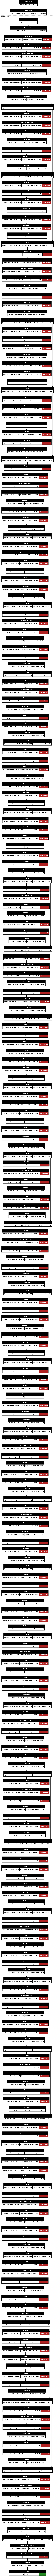

In [8]:
#we compile our model
model_created.compile(
    optimizer=tfk.optimizers.Lion(0.001),
    loss=tfk.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)
model_created.summary(expand_nested=True)
tfk.utils.plot_model(model_created, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

# TRAINING THE MODEL

In this cell we train the output layer of our model. This allows us to use the already trained layers of the model, that have been previously frozen, to make predictions on our training set without the weights of the model changing, allowing the training of the new top layer that we added.


In [9]:
history = model_created.fit(
    x = X_train,
    y = y_train,
    batch_size = 64,
    shuffle=True,
    epochs = 100,
    validation_data = (X_val, y_val),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'ConvenextBaseWeightAug_mix'+str(final_val_accuracy)+'.keras'
model_created.save(model_filename)

# Delete the model to free up resources
del model_created

Epoch 1/100


2024-11-23 13:11:18.821046: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
W0000 00:00:1732363879.022163   26777 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363879.061705   26777 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363879.082867   26777 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363879.094861   26777 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363879.105113   26777 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363879.116974   26777 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363879.134699   26777 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363879.166203   26777 gpu_t

145/146 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.3580 - loss: 1.9182

W0000 00:00:1732363920.217423   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363920.218543   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363920.219501   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363920.220209   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363920.220931   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363920.221698   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363920.222409   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363920.223128   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363920.223864   26774 gp

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.3588 - loss: 1.9155

W0000 00:00:1732363921.485011   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363921.485958   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363921.487269   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363921.488428   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363921.489572   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363921.490991   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363921.492307   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363921.493633   26774 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732363921.494839   26774 gp

146/146 ━━━━━━━━━━━━━━━━━━━━ 78s 436ms/step - accuracy: 0.3597 - loss: 1.9130 - val_accuracy: 0.7354 - val_loss: 0.8391
Epoch 2/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 56s 381ms/step - accuracy: 0.6251 - loss: 1.1920 - val_accuracy: 0.7626 - val_loss: 0.7290
Epoch 3/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 66s 452ms/step - accuracy: 0.6452 - loss: 1.1285 - val_accuracy: 0.7701 - val_loss: 0.6883
Epoch 4/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 58s 398ms/step - accuracy: 0.6340 - loss: 1.1347 - val_accuracy: 0.7743 - val_loss: 0.6905
Epoch 5/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 65s 445ms/step - accuracy: 0.6421 - loss: 1.1378 - val_accuracy: 0.7525 - val_loss: 0.7214
Epoch 6/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 68s 464ms/step - accuracy: 0.6317 - loss: 1.1520 - val_accuracy: 0.7738 - val_loss: 0.6837
Epoch 7/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 69s 471ms/step - accuracy: 0.6466 - loss: 1.1175 - val_accuracy: 0.7726 - val_loss: 0.6673
Epoch 8/100
146/146 ━━━━━━━━━━━━━━━━━━━━ 64s 436ms/step - accuracy: 0.6448 - loss: 1.133

**Plotting the accuracy and loss of the model**

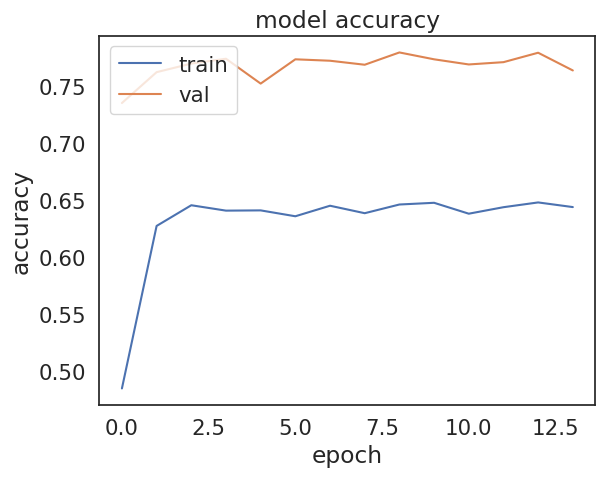

In [10]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

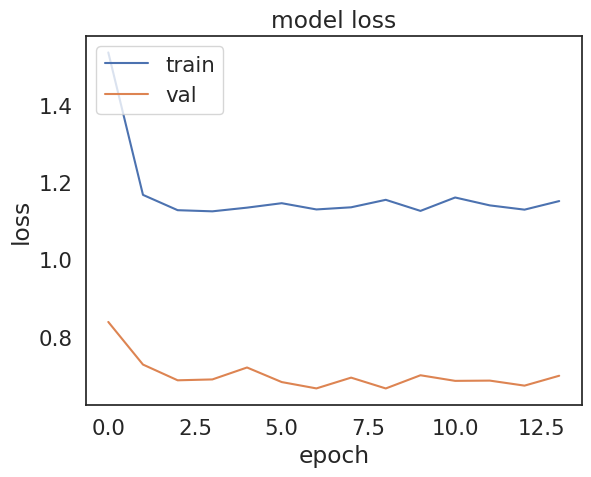

In [11]:

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# FINE TUNING
In this cell we first freeze every convolutional layers  and then unfreeze only the last sixty.
So that we are able to train our model on the new data-set while preserving the top 200 layers.

In [ ]:
model_created2=tfk.models.load_model('/home/rigers/projects/ConvenextBaseWeightAug_mix77.99.keras')
model_created2.get_layer('convnext_base').trainable=True
for layer in model_created2.get_layer('convnext_base').layers:
  layer.trainable = False
j=0
#print the number of layer in our pre trained model
for i, layer in enumerate(model_created2.get_layer('convnext_base').layers):
    j+=1
print(j) 
for i, layer in enumerate(model_created2.get_layer('convnext_base').layers):
    if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
        layer.trainable = True
        print(i, layer.name, type(layer).__name__, layer.trainable)

# Set the number of layers to freeze
N = 200

# Set the first N layers as non-trainable
for i, layer in enumerate(model_created2.get_layer('convnext_base').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(model_created2.get_layer('convnext_base').layers):
    print(i, layer.name, layer.trainable)


model_created2.summary(show_trainable=True)

model_created2.compile(
    optimizer=tfk.optimizers.Lion(1e-5),  # Low learning rate
    loss=tfk.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)
# Display model architecture with layer shapes and trainable parameters
#tfk.utils.plot_model(model_created2, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)


260
3 convnext_base_stage_0_block_0_depthwise_conv Conv2D True
10 convnext_base_stage_0_block_1_depthwise_conv Conv2D True
17 convnext_base_stage_0_block_2_depthwise_conv Conv2D True
25 convnext_base_stage_1_block_0_depthwise_conv Conv2D True
32 convnext_base_stage_1_block_1_depthwise_conv Conv2D True
39 convnext_base_stage_1_block_2_depthwise_conv Conv2D True
47 convnext_base_stage_2_block_0_depthwise_conv Conv2D True
54 convnext_base_stage_2_block_1_depthwise_conv Conv2D True
61 convnext_base_stage_2_block_2_depthwise_conv Conv2D True
68 convnext_base_stage_2_block_3_depthwise_conv Conv2D True
75 convnext_base_stage_2_block_4_depthwise_conv Conv2D True
82 convnext_base_stage_2_block_5_depthwise_conv Conv2D True
89 convnext_base_stage_2_block_6_depthwise_conv Conv2D True
96 convnext_base_stage_2_block_7_depthwise_conv Conv2D True
103 convnext_base_stage_2_block_8_depthwise_conv Conv2D True
110 convnext_base_stage_2_block_9_depthwise_conv Conv2D True
117 convnext_base_stage_2_block_10_

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 96, 96, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ preprocessing (Sequential)  │ (None, 96, 96, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ convnext_base (Functional)  │ (None, 1024)          │ 87,566,464 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout (Dropout)           │ (None, 1024)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 8)             │      8,200 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 87,582,866 (334.10 MB)

 Trainable params: 289,800 (1.11 MB)

 Non-trainable params: 87,284,864 (332.97 MB)

 Optimizer params: 8,202 (32.04 KB)

# Fitting of the model
* We use only 3 epochs to avoid overfitting the model to the new dataset.

In [13]:
epochs = 3
print("Fitting the end-to-end model")
hystory=model_created2.fit(
    X_train,
    y_train,
    batch_size=64,
    shuffle=True,
    epochs=epochs,
    validation_data=(X_val,y_val)
).history
final_val_accuracy = round(max(hystory['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'ConvNextbaseNewFourier2'+str(final_val_accuracy)+'.keras'
model_created2.save(model_filename)

# Delete the model to free up resources
del model_created2

Fitting the end-to-end model
Epoch 1/3


W0000 00:00:1732365149.164528   26780 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365149.183890   26780 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365149.184813   26780 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365149.185719   26780 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365149.186613   26780 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365149.187698   26780 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365149.189392   26780 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365149.190558   26780 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365149.191910   26780 gp

145/146 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.6536 - loss: 1.0880

W0000 00:00:1732365213.371263   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365213.372256   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365213.373258   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365213.374039   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365213.374761   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365213.375519   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365213.376313   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365213.377120   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365213.377936   26779 gp

146/146 ━━━━━━━━━━━━━━━━━━━━ 103s 606ms/step - accuracy: 0.6537 - loss: 1.0878 - val_accuracy: 0.7949 - val_loss: 0.6404
Epoch 2/3
146/146 ━━━━━━━━━━━━━━━━━━━━ 83s 566ms/step - accuracy: 0.6696 - loss: 1.0697 - val_accuracy: 0.8010 - val_loss: 0.6227
Epoch 3/3
146/146 ━━━━━━━━━━━━━━━━━━━━ 85s 583ms/step - accuracy: 0.6764 - loss: 1.0288 - val_accuracy: 0.8072 - val_loss: 0.5973
Final validation accuracy: 80.72%


**Plotting accuracy and loss**

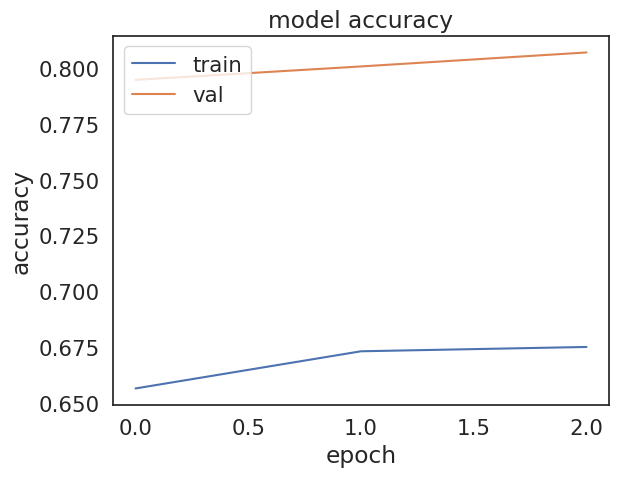

In [14]:
plt.plot(hystory['accuracy'])
plt.plot(hystory['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

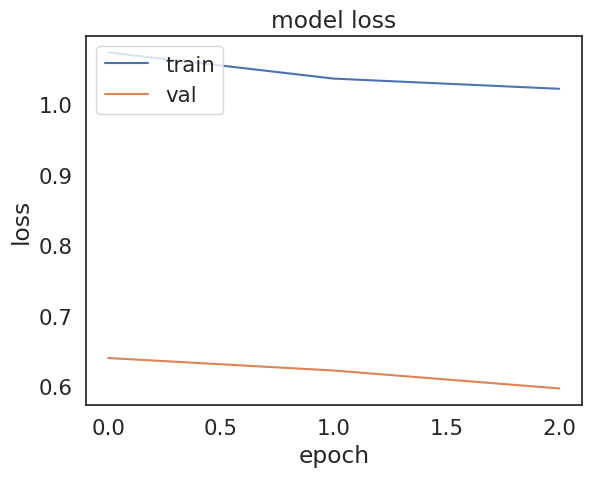

In [15]:
plt.plot(hystory['loss'])
plt.plot(hystory['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# INFERENCE OF THE MODEL
* We test the model with a non  augmented unseen test set. 

In [16]:
labels = {0:'Basophil', 1:'Eosinophil', 2:'Erythroblast', 3:'Immature granulocytes', 4:'Lymphocyte', 5:'Monocyte', 6:'Neutrophil', 7:'Platelet'}


W0000 00:00:1732365462.711117   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365462.717527   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365462.728102   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365462.831992   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365462.909615   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365462.911043   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365462.912024   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365462.912963   26779 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1732365462.915701   26779 gp

(1328, 8)
Accuracy score over the test set: 0.9164
Precision score over the test set: 0.9167
Recall score over the test set: 0.9164
F1 score over the test set: 0.9161


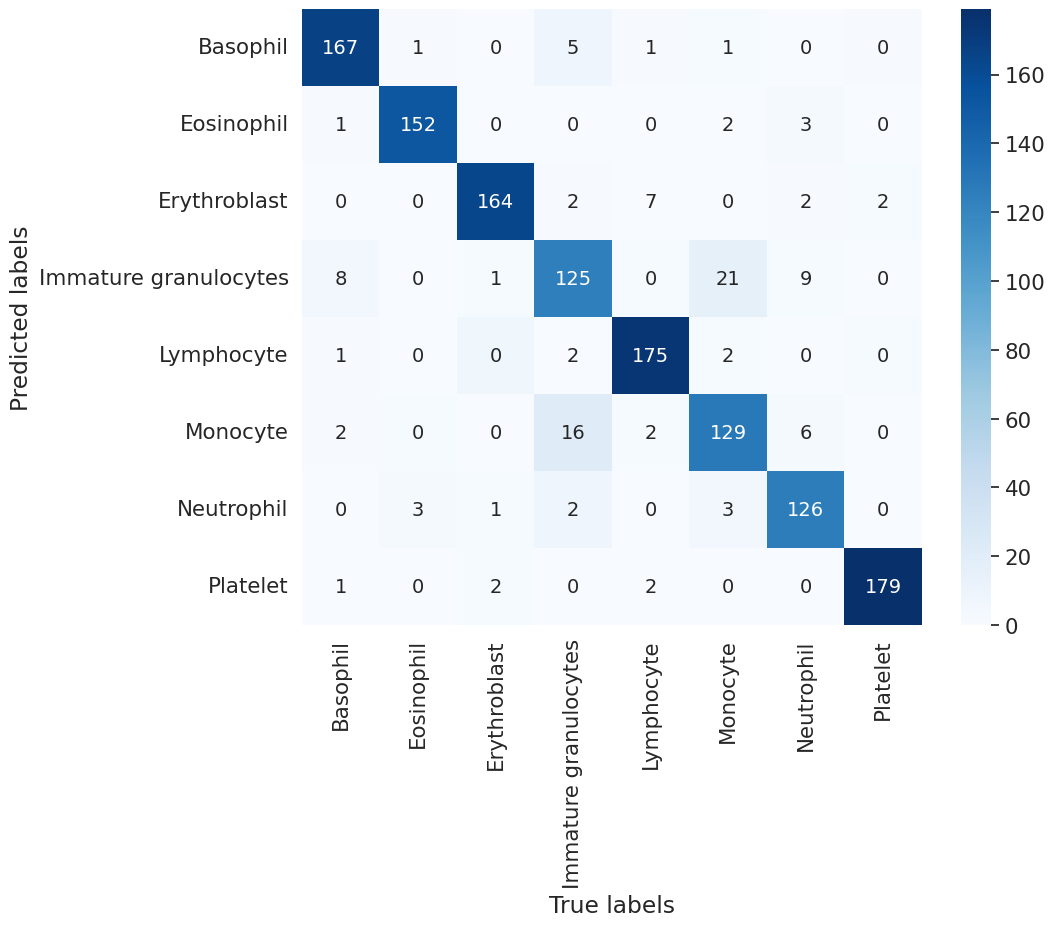

In [17]:

model=tfk.models.load_model('/home/rigers/projects/ConvNextbaseNewFourier280.72.keras')
predictions = model.predict(X_test, verbose=0)
pred_classes = np.argmax(predictions, axis=-1)

# Extract ground truth classes
true_classes = np.argmax(y_test, axis=-1)
print(y_test.shape)
accuracy = accuracy_score(true_classes, pred_classes)
print(f'Accuracy score over the test set: {round(accuracy, 4)}')

# Calculate and display test set precision
precision = precision_score(true_classes, pred_classes, average='weighted')
print(f'Precision score over the test set: {round(precision, 4)}')

# Calculate and display test set recall
recall = recall_score(true_classes, pred_classes, average='weighted')
print(f'Recall score over the test set: {round(recall, 4)}')

# Calculate and display test set F1 score
f1 = f1_score(true_classes, pred_classes, average='weighted')
print(f'F1 score over the test set: {round(f1, 4)}')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, pred_classes)
annot = np.array([f"{num}" for num in cm.flatten()]).reshape(cm.shape)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm.T, annot=annot, fmt='', xticklabels=list(labels.values()), yticklabels=list(labels.values()), cmap='Blues')
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()